In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터가 있는 폴더
data_dir = 'D://DACON/11_exercise/data'


# 데이터 불러오기
train = pd.read_csv('{data_dir}/train_features.csv'.format(data_dir=data_dir))
train_labels = pd.read_csv('{data_dir}/train_labels.csv'.format(data_dir=data_dir))
test = pd.read_csv('{data_dir}/test_features.csv'.format(data_dir=data_dir))
submission = pd.read_csv('{data_dir}/sample_submission.csv'.format(data_dir=data_dir))

print('train 데이터셋의 크기: {0}'.format(train.shape))
print('train labels의 크기: {0}'.format(train_labels.shape))
print('test 데이터셋의 크기: {0}'.format(test.shape))
print('test estimation의 크기: {0}'.format(submission.shape))

train 데이터셋의 크기: (1875000, 8)
train labels의 크기: (3125, 3)
test 데이터셋의 크기: (469200, 8)
test estimation의 크기: (782, 62)


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469200 entries, 0 to 469199
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      469200 non-null  int64  
 1   time    469200 non-null  int64  
 2   acc_x   469200 non-null  float64
 3   acc_y   469200 non-null  float64
 4   acc_z   469200 non-null  float64
 5   gy_x    469200 non-null  float64
 6   gy_y    469200 non-null  float64
 7   gy_z    469200 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 28.6 MB
None


In [4]:
train_merged = pd.merge(train,train_labels, on='id', how='outer')
train_merged.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)


In [5]:
train_merged[train_merged.label == 1]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
72600,121,0,0.640598,-0.769199,0.636089,14.942746,32.510663,40.129182,1,Band Pull-Down Row
72601,121,1,0.655655,-0.810453,0.599642,24.803914,22.240559,49.459860,1,Band Pull-Down Row
72602,121,2,0.636468,-0.866491,0.621542,31.280562,20.172610,57.321120,1,Band Pull-Down Row
72603,121,3,0.510725,-0.900305,0.633921,46.846085,25.326565,53.250757,1,Band Pull-Down Row
72604,121,4,0.460270,-0.912396,0.560737,63.922149,46.618421,49.819528,1,Band Pull-Down Row
...,...,...,...,...,...,...,...,...,...,...
1777795,2962,595,0.859059,-0.706300,0.184757,189.294862,30.120133,46.744970,1,Band Pull-Down Row
1777796,2962,596,0.836479,-0.569470,0.273326,200.567124,54.751772,39.662804,1,Band Pull-Down Row
1777797,2962,597,0.762923,-0.576776,0.354858,196.140947,72.874527,35.860743,1,Band Pull-Down Row
1777798,2962,598,0.687885,-0.680597,0.367335,209.204177,84.062538,28.589794,1,Band Pull-Down Row


In [ ]:
# label == 1의 그래프 확인
train_merged

In [57]:
list_lab1 = list(train_merged[train_merged.label == 1].id.unique())
len(list_lab1)

21

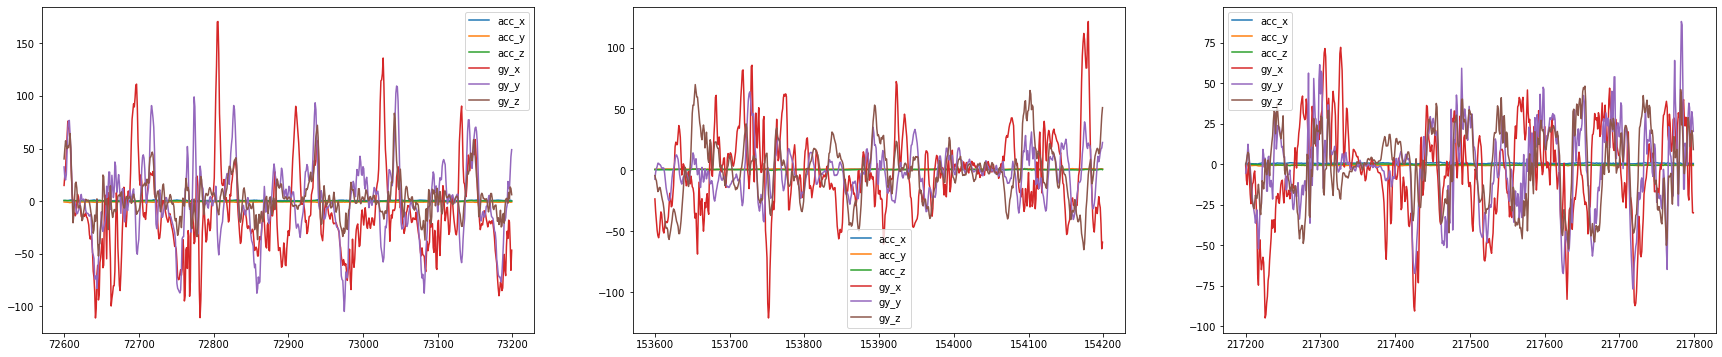

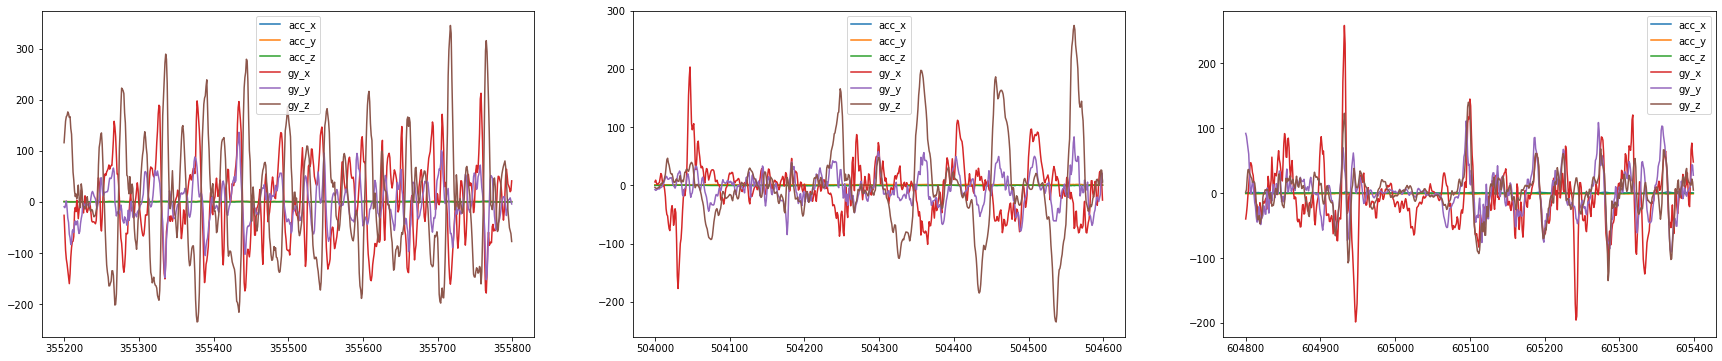

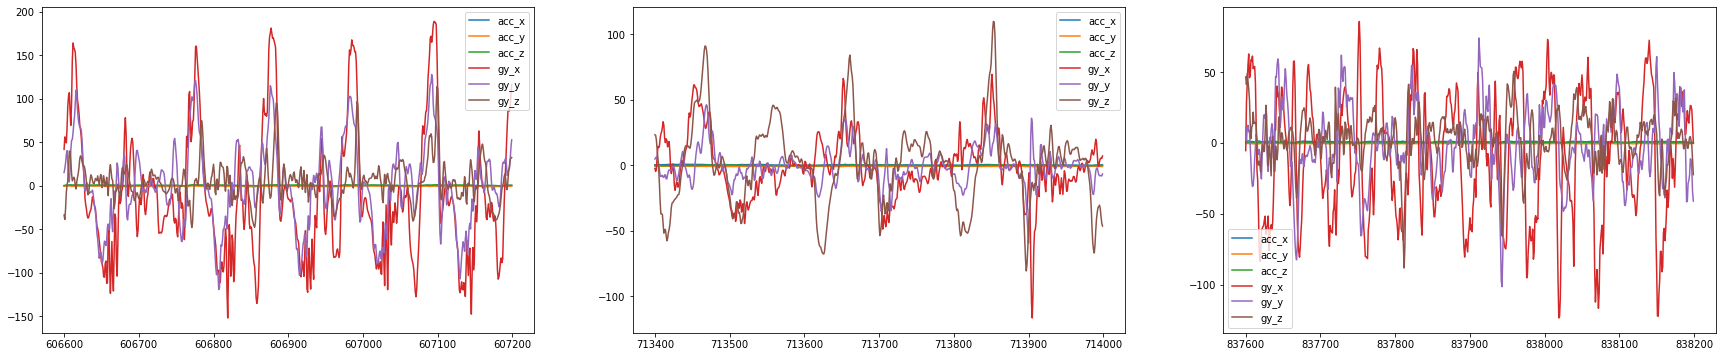

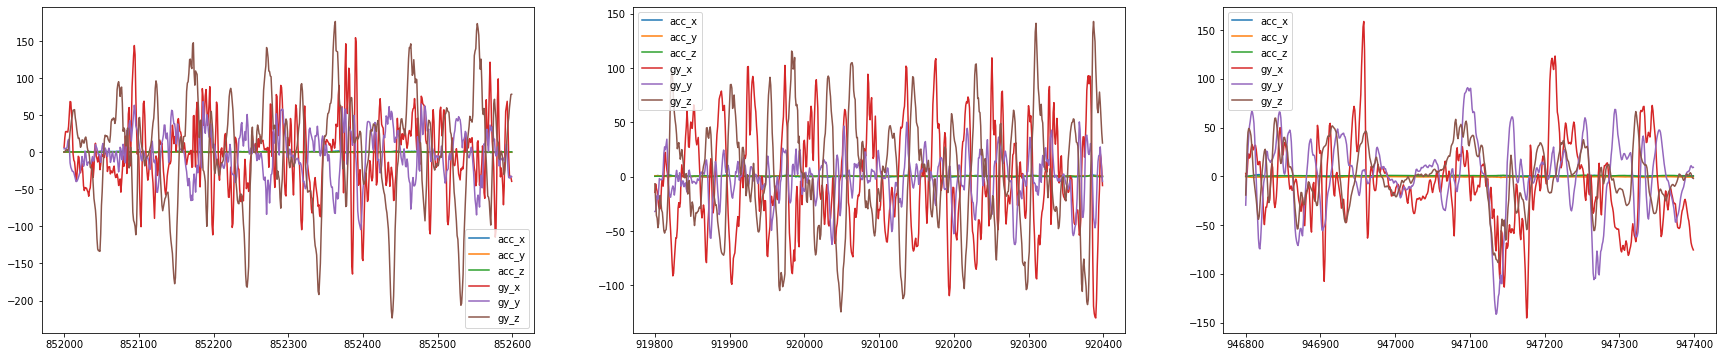

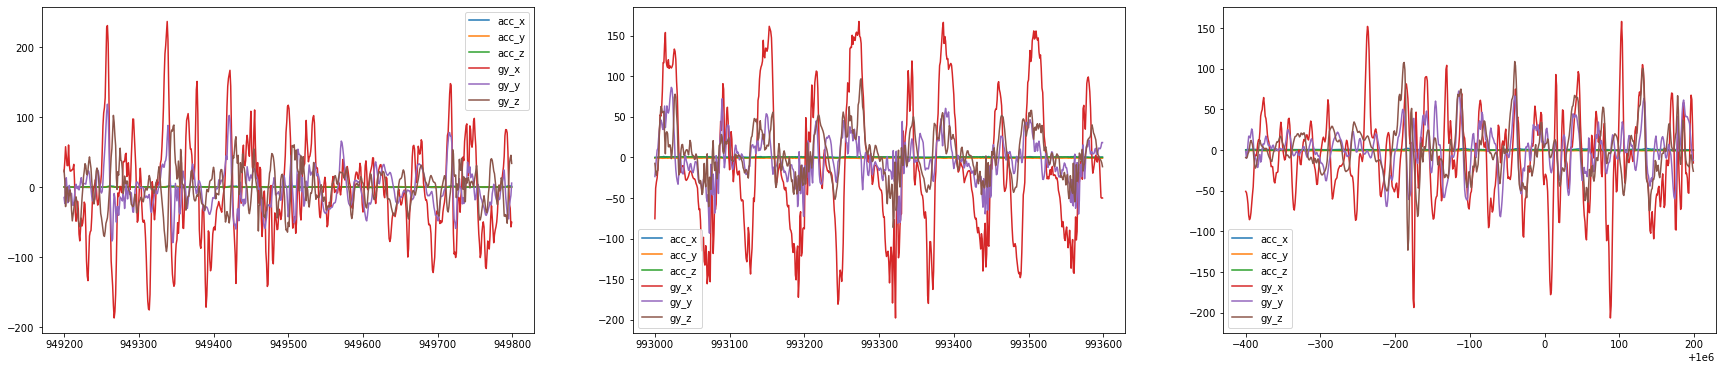

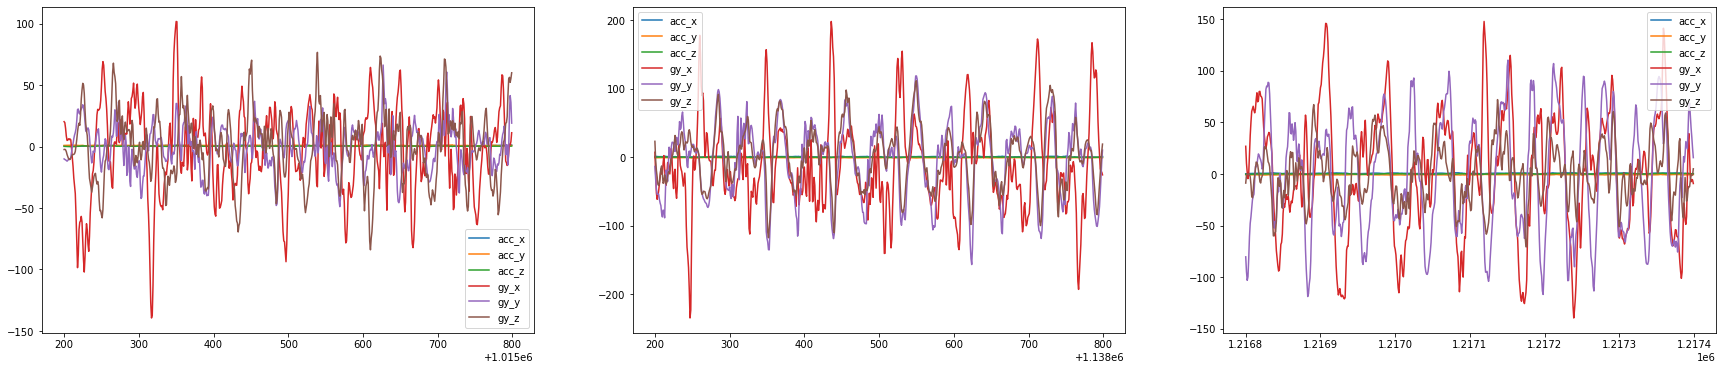

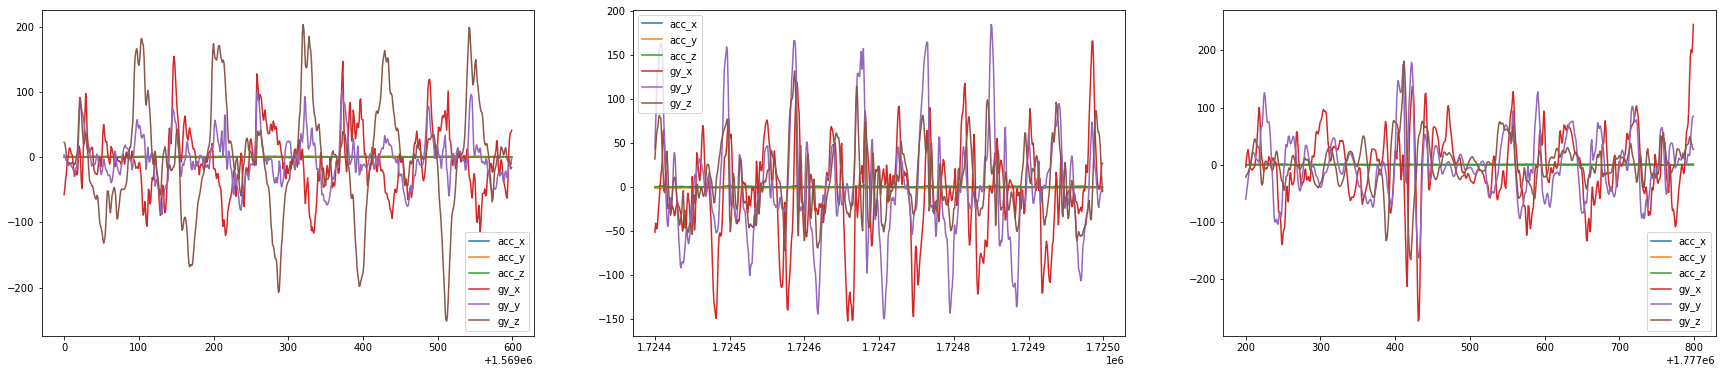

In [58]:
legend = ['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z']
for i in range(7):
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches((30, 6)) 
    for j in range(3):
        ex = train[train.id == list_lab1[0]]
        axes[j].plot(ex.iloc[:,2:])
        axes[j].legend(legend)
        list_lab1.pop(0)

- 공통의 특성을 찾기 매우 힘들다
- gy_y는 전체에서 비교적 일정한 범위 이내에서 등락을 보임
- acc_x, acc_y, acc_z는 변하지 않음 => Band Pull-Down Row라는 운동의 특성을 따져보았을때 합리적 => 정적인 운동 동작이기 때문
- 